## Convolution Neural Network (Image Classification)

### Goal:
The goal in this module will be to use the images in the CIFAR-10 dataset and use Convolutional Neural Network to try to classify each image. 

In [2]:
# import needed libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2023-04-07 15:12:54.028658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We will be using [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that contains colored images in 10 classes, with 6000 images per class.

In [3]:
# load the CIFAR-10 Dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# check the shape of our tesing sets
test_images.shape, test_images.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

we have 10000 images in our test_images data set and each image is 32 by 32 pixels with 3 rgb colors. 

In [5]:
# check the shape of our training sets
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

we have 50000 images in our train_images data set and each image is 32 by 32 pixels with 3 rgb colors. 

In [6]:
# observe the first 5 training labels
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# train_images is a 2d-array and we will convert to a 1d-array
train_labels = train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# we do the same for the testing labels
test_labels = test_labels.reshape(-1,)

In [9]:
# Create a list of the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [10]:
# Now we plot images
def plot_sample(X,y,index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

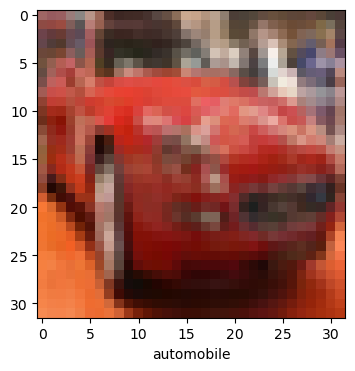

In [11]:
# plot the image with index 5
plot_sample(train_images, train_labels, 5)

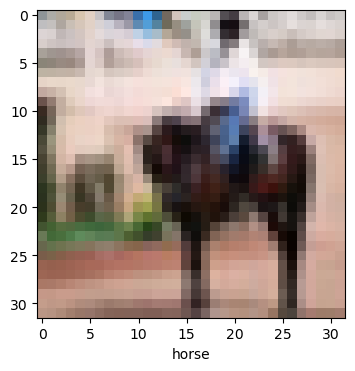

In [12]:
# plot the image with index 11
plot_sample(train_images,train_labels, 11)

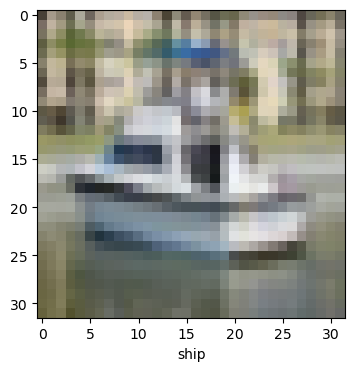

In [13]:
# plot the image with index 501
plot_sample(train_images,train_labels, 501)

In [14]:
# now we normalize the image to be between 0 to 1
train_images.max(), test_images.max()

(255, 255)

In [15]:
# make sure its float
train_images = train_images/255.0
test_images = test_images/255.0

In [16]:
# Sequential Neural Network 
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

# compile our neural network
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8074 - accuracy: 0.3551
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6238 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5424 - accuracy: 0.4573
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4842 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4316 - accuracy: 0.4979
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3884 - accuracy: 0.5119
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3515 - accuracy: 0.5263
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3176 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2842 - accuracy: 0.5498
Epoch 10/10
1563/1563 [==============================] - 48s 31m

Observe that accuracy score of the Sequential Neural Network on the training data is 56% with 10 epochs.

In [17]:
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# get label predictions on on test images
y_pred = ann.predict(test_images)

print(y_pred[0])

313/313 [==============================] - 2s 7ms/step
[0.0429049  0.15643504 0.05099189 0.503018   0.02939977 0.06725959
 0.0832449  0.00148756 0.05976699 0.00549144]


In [19]:
# use argmax function to get the index of the max number in each array
y_pred_classes = [np.argmax(element) for element in y_pred] 
print(y_pred_classes[:5])

[3, 1, 8, 0, 4]


In [20]:
# Classification Report
print("Classification Report: \n", classification_report(test_labels,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.68      0.57      1000
           1       0.48      0.83      0.61      1000
           2       0.49      0.25      0.33      1000
           3       0.31      0.49      0.38      1000
           4       0.59      0.29      0.39      1000
           5       0.45      0.39      0.42      1000
           6       0.58      0.56      0.57      1000
           7       0.61      0.57      0.59      1000
           8       0.65      0.64      0.64      1000
           9       0.68      0.42      0.52      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.54      0.51      0.50     10000



In [21]:
import seaborn as sns

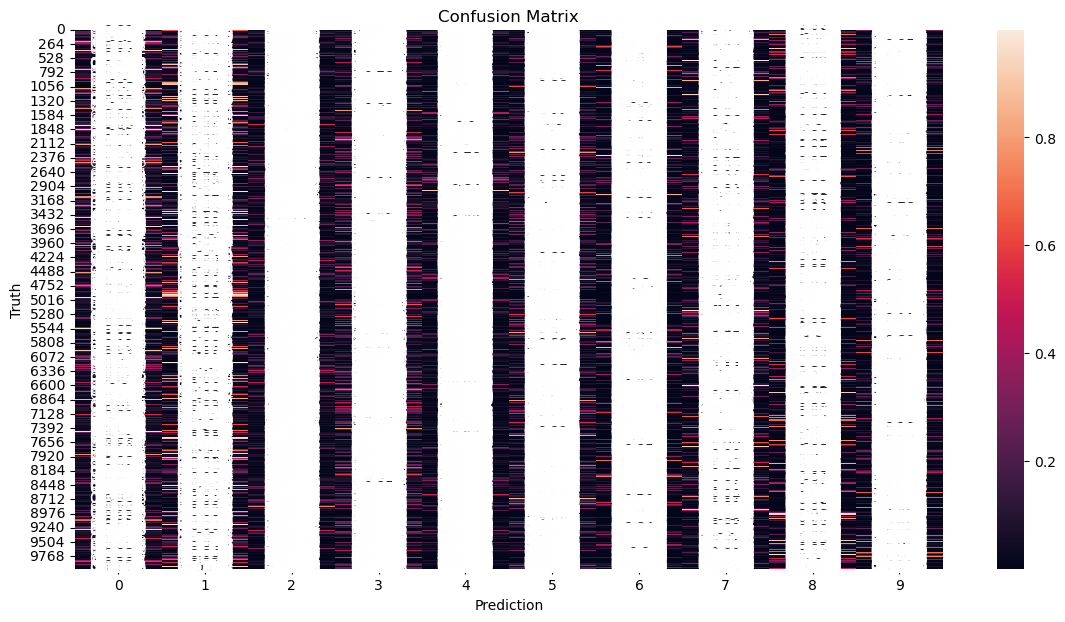

In [22]:
# plot the heatmap of the prediction array
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Convoulutional Neural Network
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # returned probabilities for each class
]) 

In [24]:
# compile our CNN 
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
# fit our cnn on our training sets on 10 epochs
cnn.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4898 - accuracy: 0.4650
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1343 - accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0004 - accuracy: 0.6500
Epoch 4/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9112 - accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8421 - accuracy: 0.7059
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7815 - accuracy: 0.7262
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7301 - accuracy: 0.7453
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6846 - accuracy: 0.7615
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6354 - accuracy: 0.7784
Epoch 10/10
1563/1563 [==============================] - 26s 16m

Observe the Convolutional Neural Network got an accuracy score of 77% on the training data with 10 epochs, which is a greater accuracy score when we used the Sequential Neural Network with similar epochs. 

In [26]:
# get Loss and Accuracy on Testing sets
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9514 - accuracy: 0.6943


[0.9513729214668274, 0.6942999958992004]

Now the accuracy score of the Convolutional Neural Network on testing sets it returned an accuracy score of 70%. 

In [27]:
# Get label predictions for each class on test images
y_pred = cnn.predict(test_images)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[2.01055533e-04 3.40608131e-05 5.97898797e-05 9.06073689e-01
 5.14907588e-04 8.65209196e-03 1.38011575e-02 4.81411007e-06
 7.05149174e-02 1.43592290e-04]


In [28]:
# argmax function to get index of the highest value in array
y_classes = [np.argmax(element) for element in y_pred]
# print predicted labels of the first 5 images
print(y_classes[:5])

[3, 8, 1, 0, 4]


In [29]:
# print the actual labels of the first 5 images
print(test_labels[:5])

[3 8 8 0 6]


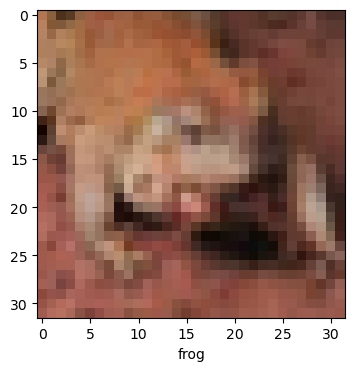

In [30]:
# plotting the image with index 5 on testing set
plot_sample(test_images, test_labels, 5)

In [31]:
# see if our predicts the image correctly
class_names[y_classes[5]]

'frog'

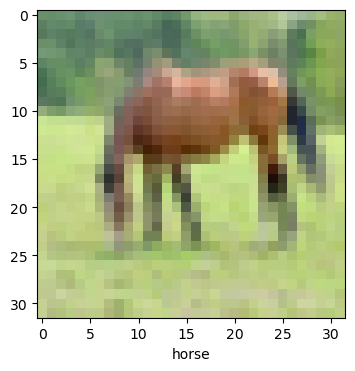

In [32]:
# plotting the image with index 60 on testing set
plot_sample(test_images, test_labels, 60)

In [33]:
# see if our predicts the image correctly
class_names[y_classes[60]]

'horse'

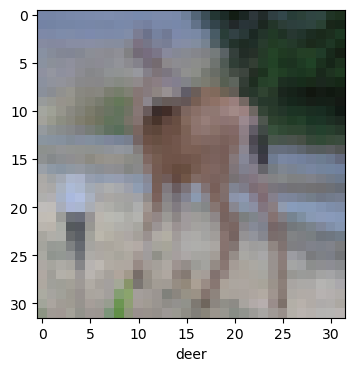

In [34]:
# plotting the image with index 100 on testing set
plot_sample(test_images,test_labels, 100)

In [35]:
# see if our predicts the image correctly
class_names[y_classes[100]]

'deer'

313/313 [==============================] - 1s 4ms/step


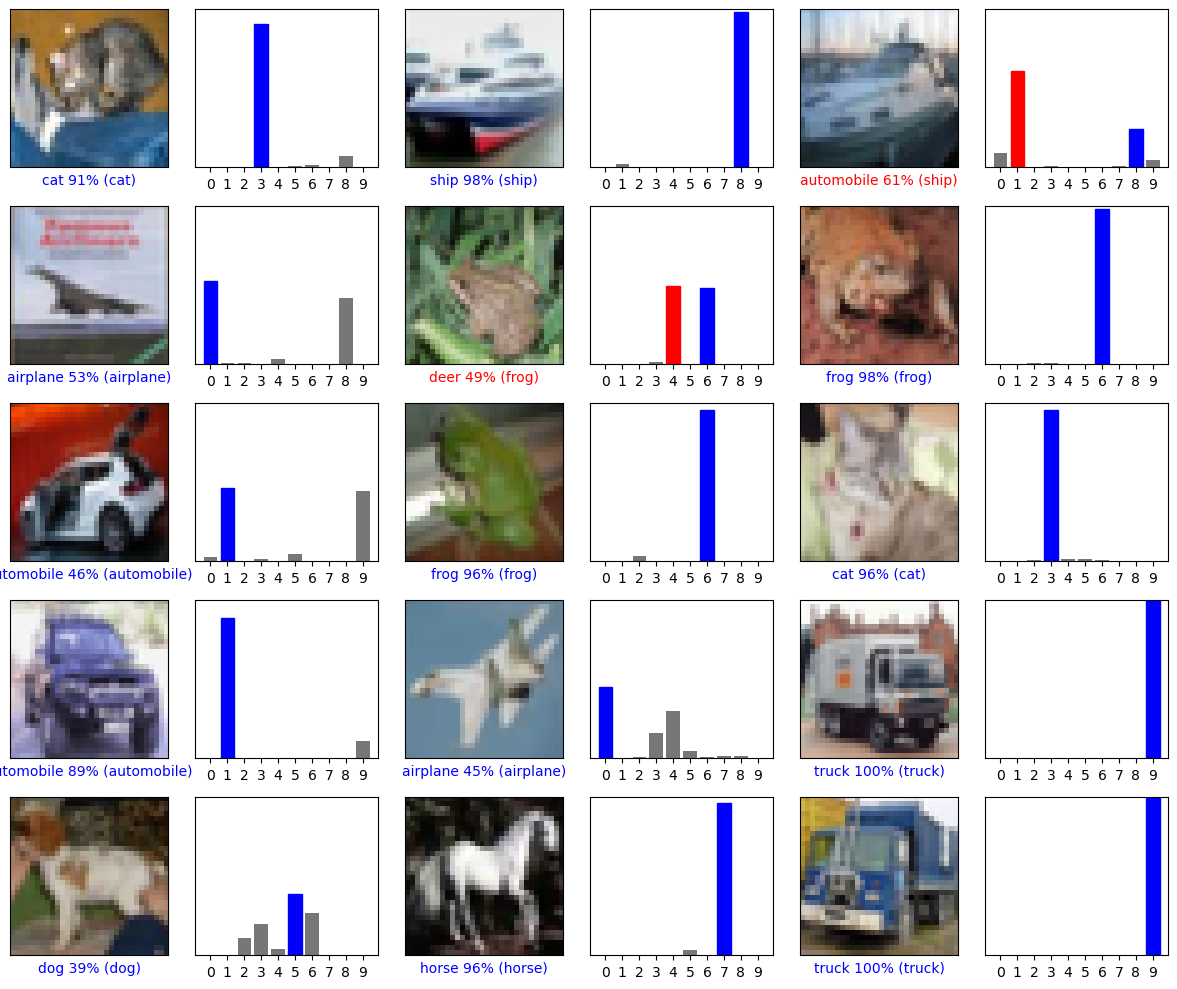

In [36]:
# Visualize predictions

# will plot 15 images along with their predicted labels.
predictions = cnn.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
    
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

From the 15 random images, our Convolutional Neural Network Model misclassified 2 images. 